# PS01 - (Not so) Simple Linear Regression

Your Name: YOUR NAME    
Collaborators: 
 - collaborator 1
 - collaborator 2


DS325, Gettysburg College     
Prof Eatai Roth

**Submit on Moodle**     
**Due before Monday Feb 9, 2026 at 9a** *(ps02 will be assigned on Feb 5, 2026)*.     


Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, in the sample analysis, I write all the import statements you should need. I also perform data cleaning and scaling. Do not redo those in your analysis.

### Problem 1

We'll be looking at U.S. public health data at a county level. The data file we'll use comes from the County Health Rankings, a study by the Roberts Wood Johnson Foundation and the University of Wisconsin Population Health Institute. The data are extensive, but we'll be looking specifically at the relationship between the percentage of children eligible for subsidized/free school lunches and the prevalence of diabetes.

This pdf explains all the data in this file (you may have interest for future use): [County Health Data Dictionary](https://github.com/GettysburgDataScience/datasets/blob/main/countyHealth_DataDictionary_2025.pdf)

Below, I've loaded selected columns from the data set and renamed them for your convenience. See below for parts a-d.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
health_df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/datasets/refs/heads/main/countyHealth_2025.csv',
                        skiprows=[0,2],
                        header = 0,
                        usecols = ['state', 'county','year', 'v065_rawvalue','v060_rawvalue']
)

health_df.rename(columns = {'v065_rawvalue':'lunch',
                  'v060_rawvalue':'diabetes'},
                 inplace = True)

health_df.info()                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     3203 non-null   object 
 1   county    3203 non-null   object 
 2   year      3203 non-null   int64  
 3   diabetes  3195 non-null   float64
 4   lunch     2955 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 125.2+ KB


### a. Data inspection and cleaning
 - Drop any rows with missing data in either the diabetes or lunch columns. Use ```dropna``` with the argument ```subset``` (check the documentation for ```dropna``` for more help).

 *For plots, be sure to have axis labels and titles where appropriate.*
 - Plot separate histograms for the 'lunch' and 'diabetes' data. Use 100 bins.
 - Plot a scatter plot of 'lunch' vs 'diabetes'. There's a lot of data, so use a small point size (s=5) and transparency (alpha = 0.3)

 *Are there any other data you think should be removed from the dataset before fitting a model?*

 - Remove data you feel might be problematic; do you have a good justification for removing these data?

In [3]:
'''your code here. Add code cells as needed.'''

'your code here. Add code cells as needed.'

### b. Modeling

- Fit a linear regression to the remaining data following the steps from class: 
    - select the feature and target data
    - train-test split
    - fit the model
    - predict the target value for the test set
    - calculate $R^2$ and MSE based on the test set
- Plot the data with a trend line super-imposed. Add the $R^2$ and MSE values to the figure as text.
- Plot a histogram of the residuals.

In [4]:
'''your code here. Add code cells as needed.'''

'your code here. Add code cells as needed.'

### c. Questions
 - If you removed any additional data, how do you justify your decision?
    - *your responses here*


 - Does this trend suggest that school lunches are unhealthy and prime a population for diabetes? Why or why not.
     - *your responses here*


## Problem 2

The Standard & Poor 500 (S&P 500) is a stock market index that uses the performance of 500 of the biggest publicly traded companies to summarize the overall performance of the market. In this problem, we'll look at records of the S&P 500 from the past 50+ years. We will use an exponential regression to model the trend of the S&P 500 and predict future values of the index.

In the first section, I do some prep work for you, since working with dates in pandas can be a bit of a pain; though you should inspect this code for your own learning. Your tasks begin at the section labeled "YOUR TASKS BEGIN HERE".

### Importing and inspecting the data

In [5]:
import datetime as dt

In [6]:
sp500_df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/datasets/refs/heads/main/sp500_1950_2025_weekly.csv', 
                    parse_dates = ['Date'], thousands = ',', usecols = ['Date', 'Price'])

display(sp500_df.head())
display(sp500_df.tail())

,Date,Price
0,2025-08-31,6437.47
1,2025-08-24,6460.26
2,2025-08-17,6466.91
3,2025-08-10,6449.80
4,2025-08-03,6389.45


,Date,Price
2900,1970-02-01,86.3
2901,1970-01-25,85.0
2902,1970-01-18,89.1
2903,1970-01-11,90.9
2904,1970-01-04,92.4


### Converting dates into integer day counts

For the regression, we'd like to represent dates as something more user-friendly than a timestamp, preferably a float. The next block of code will convert each date into a fractional year. For example, July 2 is the 183rd day of the year (the middle of the year) and its year fraction would be 0.5; the date July 2, 2025 would be converted to 2025.5.

From a timestamp, we can extract the day, month, year, day of the year by appending '''.dt.day''', '''.dt.month''', '''.dt.year''', or '''.dt.dayofyear''' to the timestamp variable.[ Here's a good summary of date/time functions in Pandas](https://www.geeksforgeeks.org/pandas/date-and-time-operations-in-pandas-series/)

In [7]:
sp500_df['DateNum'] = sp500_df['Date'].dt.year + sp500_df['Date'].dt.dayofyear/365. # ignoring leap years, whatever
sp500_df[['Date', 'DateNum']].head(10)

,Date,DateNum
0,2025-08-31,2025.665753
1,2025-08-24,2025.646575
2,2025-08-17,2025.627397
3,2025-08-10,2025.608219
4,2025-08-03,2025.589041
5,2025-07-27,2025.569863
6,2025-07-20,2025.550685
7,2025-07-13,2025.531507
8,2025-07-06,2025.512329
9,2025-06-29,2025.493151


### Visualizing

We can still plot using timestamp data, and this makes the resulting graph more readable. So later, we'll want to keep a copy of dates as 'DateNum' (integers) for modeling and another copy as 'Date' (timestamps) for plotting.

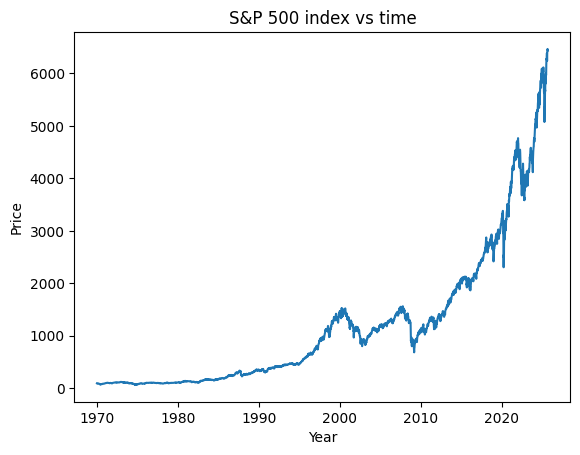

In [8]:
plt.plot(sp500_df['DateNum'], sp500_df['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('S&P 500 index vs time')
plt.show()

**YOUR TASKS BEGIN HERE**

You will use the Price (Adj Closing value) as the target (y) and DateNum as the feature (x) to fit a linear regression. 

BUT THESE DATA SURE DON'T LOOK LINEAR!?

No, they aren't. The market grows exponentially. So in order to fit a linear regression, we will first transform the target data using a log. We'll then fit the regression on the tranformed data and subsequently re-exponentiate the outputs.

$$
\hat{y} = e^{\theta_1 \cdot x + \theta_0}\\
ln(\hat{y}) = \theta_1 \cdot x + \theta_0
$$

## a. 
 - Fit an exponential model to the entire data by transforming the target using ```np.log```. 
 - Plot the date vs log(y) and verify the data look mostly linear.
 - Fit a linear regression to the log-transformed data.
 - Once you have a linear regression fit, you can make predictions of the actual price by exponentiating the output from the linear regression: ```np.exp(ln_y_pred)```
 - Plot the data and the model-predicted trend.
 - Use the model to predict the value of the S&P 500 on Jan 1 of 2025, 2030, and 2070 (about the time you all might be retiring).

In [9]:
'''your code here. Add code cells as needed.'''

'your code here. Add code cells as needed.'

#

Input your S&P 500 predictions for:

 - 2025: *your value*
 - 2030: *your value*
 - 2070: *your value*

## b. 
 - Filter the data to only dates before 1995.
 - Fit an exponential model to this data set.
 - Use this model to predict the S&P 500 for 1995-2015; use 10 increments per year (e.g. 2015.1, 2015.2, etc.).
 - Plot the data, and the model-predicted trend.

In [10]:
'''your code here. Add code cells as needed.'''

'your code here. Add code cells as needed.'

### c.
Answer the following questions (you may want to write some more code to get these answers).
 - You'll notice two humps in the data between 1995 and 2010. They represent the dot-com and housing bubbles that burst in 2000 and 2008 respectively. For each bubble, at its peak, by how much did the index exceed the pre-1995 projections.
    - 2000: *your answer*
    - 2008: *your answer*

 - After the bursts, did the S&P 500 return to the trend established before the bubbles?
    - *your answer*